## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4,1e-6]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

W0721 18:58:45.935984  4444 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 18:58:46.075191  4444 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0721 18:58:46.439278  4444 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 346us/step - loss: 198.6537 - acc: 0.2222 - val_loss: 41.1424 - val_acc: 0.2549
Epoch 2/50
50000/50000 [==============================] - 16s 317us/step - loss: 19.1123 - acc: 0.1168 - val_loss: 7.2862 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 16s 321us/step - loss: 4.1131 - acc: 0.0983 - val_loss: 2.6511 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 16s 317us/step - loss: 2.4864 - acc: 0.0985 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 16s 318us/step - loss: 2.4626 - acc: 0.0963 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 16s 313us/step - loss: 2.4626 - acc: 0.0982 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 16s 317us/step - loss: 2.4626 - acc: 0.0988 - val_loss

50000/50000 [==============================] - 17s 346us/step - loss: 6.0291 - acc: 0.2682 - val_loss: 5.8283 - val_acc: 0.3368
Epoch 2/50
50000/50000 [==============================] - 16s 326us/step - loss: 5.7361 - acc: 0.3624 - val_loss: 5.6510 - val_acc: 0.3755
Epoch 3/50
50000/50000 [==============================] - 16s 317us/step - loss: 5.5839 - acc: 0.3914 - val_loss: 5.5177 - val_acc: 0.4003
Epoch 4/50
50000/50000 [==============================] - 16s 324us/step - loss: 5.4599 - acc: 0.4121 - val_loss: 5.3983 - val_acc: 0.4234
Epoch 5/50
50000/50000 [==============================] - 16s 318us/step - loss: 5.3496 - acc: 0.4284 - val_loss: 5.2983 - val_acc: 0.4371
Epoch 6/50
50000/50000 [==============================] - 16s 319us/step - loss: 5.2478 - acc: 0.4404 - val_loss: 5.2162 - val_acc: 0.4378
Epoch 7/50
50000/50000 [==============================] - 16s 317us/step - loss: 5.1505 - acc: 0.4540 - val_loss: 5.1176 - val_acc: 0.4519
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.8333 - acc: 0.3707 - val_loss: 1.7856 - val_acc: 0.3857
Epoch 3/50
50000/50000 [==============================] - 16s 325us/step - loss: 1.7501 - acc: 0.4013 - val_loss: 1.7306 - val_acc: 0.4008
Epoch 4/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.6905 - acc: 0.4217 - val_loss: 1.6720 - val_acc: 0.4263
Epoch 5/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.6448 - acc: 0.4381 - val_loss: 1.6473 - val_acc: 0.4356
Epoch 6/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.6057 - acc: 0.4523 - val_loss: 1.6107 - val_acc: 0.4447
Epoch 7/50
50000/50000 [==============================] - 16s 317us/step - loss: 1.5725 - acc: 0.4630 - val_loss: 1.5792 - val_acc: 0.4581
Epoch 8/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.5409 - acc: 0.4754 - val_loss: 1.5596 - val_acc: 0.4620
Epoch 9/50
50000/50000 [===

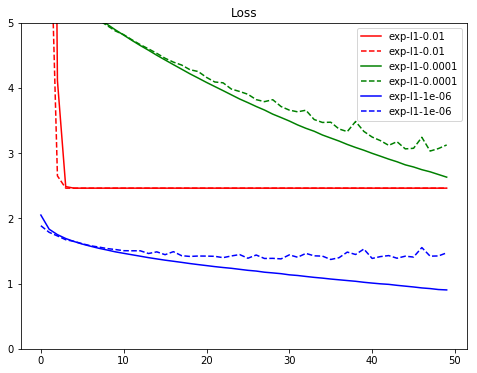

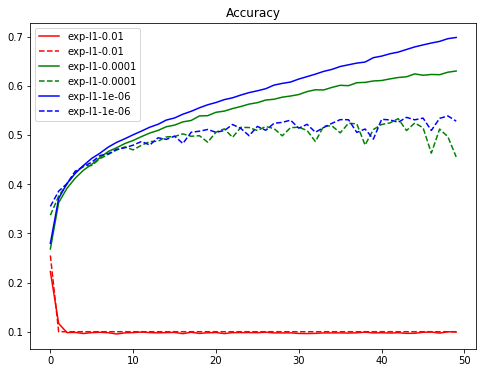

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()